In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
import sklearn
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('../Clean_Data.csv', index_col=False)

In [4]:
df_CO2_Scaled = pd.read_csv('../Scaled_data.csv')

In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.head()

,Year,Total,Coal,Oil,Gas,Flaring,Per Capita,Antarctica,Asia,Europe,North America,Oceania,South America
0,1950-01-01,0.084272,0.021068,0.063204,0.0,0.0,0.011266,0,1,0,0,0,0
1,1951-01-01,0.091600,0.025648,0.065952,0.0,0.0,0.012098,0,1,0,0,0,0
2,1952-01-01,0.091600,0.031708,0.059892,0.0,0.0,0.011946,0,1,0,0,0,0
3,1953-01-01,0.106256,0.037949,0.068307,0.0,0.0,0.013685,0,1,0,0,0,0
4,1954-01-01,0.106256,0.042502,0.063754,0.0,0.0,0.013511,0,1,0,0,0,0


In [7]:
df['Year']=df['Year'].astype(str)
df['Year']=[x[:4] for x in df['Year']]
df['Year']=pd.to_datetime(df['Year'], format='%Y')

In [8]:
year_total = df[['Year','Total']]
year_total.set_index('Year', inplace=True)
year_total.sort_index(inplace=True)
year_total.index = pd.DatetimeIndex(year_total.index).to_period('Y')

C:\Users\akhil\AppData\Local\Temp\ipykernel_13576\4241208767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_total.sort_index(inplace=True)


In [9]:
df_World = pd.read_csv('../df_World.csv')
df_World.set_index('Year', inplace=True)
df_World.sort_index(inplace=True)
df_World.index = pd.DatetimeIndex(df_World.index).to_period('Y')
df_World.index = df_World.index.to_timestamp()

In [11]:
df.dtypes

Year             datetime64[ns]
Total                   float64
Coal                    float64
Oil                     float64
Gas                     float64
Flaring                 float64
Per Capita              float64
Antarctica                int64
Asia                      int64
Europe                    int64
North America             int64
Oceania                   int64
South America             int64
dtype: object

In [12]:
year_total.head()

,Total
Year,
1820,3.381872
1820,2.901888
1820,0.333424
1820,42.528048
1820,0.791424


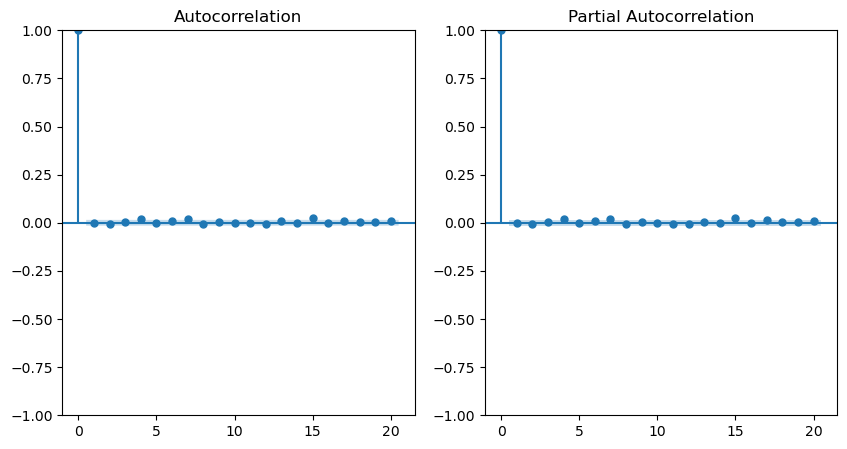

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(year_total, lags=20, alpha=0.05, ax=ax[0])
plot_pacf(year_total, lags=20, alpha=0.05, ax=ax[1])
plt.savefig('output.png')
plt.show()

In [15]:
df.set_index('Year', inplace=True)
df.sort_index(inplace=True)

In [16]:
df.index = pd.DatetimeIndex(df.index).to_period('Y')

In [17]:
X = df.drop(columns='Total')
y = df['Total']

In [18]:
tss = TimeSeriesSplit(n_splits = 5)

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in tss.split(df):
    train_data, test_data = df.Total.iloc[train_index], df.Total.iloc[test_index]

    model = ARIMA(train_data, order = (0,0,0))
    fitted_model = model.fit()

    y_pred = fitted_model.forecast(steps=len(test_data))

    mse = mean_squared_error(test_data, y_pred)
    mse_scores.append(mse)

    mae = mean_absolute_error(test_data, y_pred)
    mae_scores.append(mae)

    r2 = r2_score(test_data, y_pred)
    r2_scores.append(r2)
    
    print(f'Mean Squared Error for current split: {mse}', len(train_index))
    print(f'Mean Absolute Error for current split: {mae}', len(train_index))
    print(f'r squared for current split: {r2}', len(train_index))

Mean Squared Error for current split: 64203.774130229285 2821
Mean Absolute Error for current split: 97.82062700067047 2821
r squared for current split: -0.011071756120255127 2821
Mean Squared Error for current split: 142870.47131723602 5639
Mean Absolute Error for current split: 110.28077195552204 5639
r squared for current split: -0.0029827645083631005 5639
Mean Squared Error for current split: 184200.27385513214 8457
Mean Absolute Error for current split: 127.53109113579559 8457
r squared for current split: -0.005123645387641318 8457
Mean Squared Error for current split: 302422.62781259697 11275
Mean Absolute Error for current split: 149.65562667090396 11275
r squared for current split: -0.006196067763491575 11275
Mean Squared Error for current split: 633279.1146584868 14093
Mean Absolute Error for current split: 187.16072686155172 14093
r squared for current split: -0.007915148067880518 14093


In [20]:
from sklearn.preprocessing import StandardScaler

index = df.index
columns = df.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=columns, index=index)

In [21]:
mse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in tss.split(df):
    train_data, test_data = df_scaled.Total.iloc[train_index], df_scaled.Total.iloc[test_index]

    model = ARIMA(train_data, order = (0,0,0))
    fitted_model = model.fit()

    y_pred = fitted_model.forecast(steps=len(test_data))

    mse = mean_squared_error(test_data, y_pred)
    mse_scores.append(mse)

    mae = mean_absolute_error(test_data, y_pred)
    mae_scores.append(mae)

    r2 = r2_score(test_data, y_pred)
    r2_scores.append(r2)
    
    print(f'Mean Squared Error for current split: {mse}', len(train_index))
    print(f'Mean Absolute Error for current split: {mae}', len(train_index))
    print(f'r squared for current split: {r2}', len(train_index))

Mean Squared Error for current split: 0.2771732913062143 2821
Mean Absolute Error for current split: 0.20324052834131995 2821
r squared for current split: -0.011067989227929953 2821
Mean Squared Error for current split: 0.6167872888094439 5639
Mean Absolute Error for current split: 0.2291318793221406 5639
r squared for current split: -0.0029839163191307527 5639
Mean Squared Error for current split: 0.7952134904342297 8457
Mean Absolute Error for current split: 0.2649700103399035 8457
r squared for current split: -0.005126026439914222 8457
Mean Squared Error for current split: 1.305590618734086 11275
Mean Absolute Error for current split: 0.31094589103921827 11275
r squared for current split: -0.00619676131309177 11275
Mean Squared Error for current split: 2.7339327885306877 14093
Mean Absolute Error for current split: 0.3888727957620366 14093
r squared for current split: -0.007915680707704764 14093


In [24]:
import numpy as np
year_total['Total_log'] = np.log(year_total.Total)
year_total.head()

C:\Users\akhil\AppData\Local\Temp\ipykernel_13576\1735137274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_total['Total_log'] = np.log(year_total.Total)


,Total,Total_log
Year,,
1820,3.381872,1.218429
1820,2.901888,1.065362
1820,0.333424,-1.098340
1820,42.528048,3.750164
1820,0.791424,-0.233921


In [25]:
mse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in tss.split(df):
    train_data, test_data = year_total.Total_log.iloc[train_index], year_total.Total_log.iloc[test_index]

    model = ARIMA(train_data, order = (0,0,0))
    fitted_model = model.fit()

    y_pred = fitted_model.forecast(steps=len(test_data))

    mse = mean_squared_error(test_data, y_pred)
    mse_scores.append(mse)

    mae = mean_absolute_error(test_data, y_pred)
    mae_scores.append(mae)

    r2 = r2_score(test_data, y_pred)
    r2_scores.append(r2)
    
    print(f'Mean Squared Error for current split: {mse}', len(train_index))
    print(f'Mean Absolute Error for current split: {mae}', len(train_index))
    print(f'r squared for current split: {r2}', len(train_index))

Mean Squared Error for current split: 9.47872664394506 2821
Mean Absolute Error for current split: 2.4985820283388676 2821
r squared for current split: -0.17420840655302872 2821
Mean Squared Error for current split: 8.076181235110782 5639
Mean Absolute Error for current split: 2.355203358275878 5639
r squared for current split: -0.0029162502766248988 5639
Mean Squared Error for current split: 8.01052940617979 8457
Mean Absolute Error for current split: 2.35685274100896 8457
r squared for current split: -0.013892954902080978 8457
Mean Squared Error for current split: 7.924473037801892 11275
Mean Absolute Error for current split: 2.315890324969742 11275
r squared for current split: -0.024430039915275037 11275
Mean Squared Error for current split: 7.661347265043023 14093
Mean Absolute Error for current split: 2.2593146232820627 14093
r squared for current split: -0.06634013901717495 14093


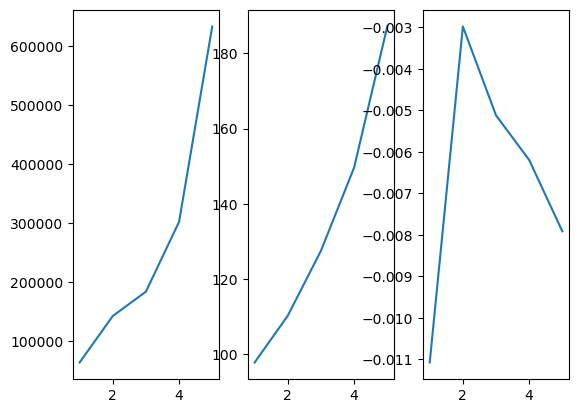

In [18]:
split = [1,2,3,4,5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plot_mse = ax1.plot(split,mse_scores)
plot_mae = ax2.plot(split,mae_scores)
plot_r2 = ax3.plot(split,r2_scores)
plt.show()

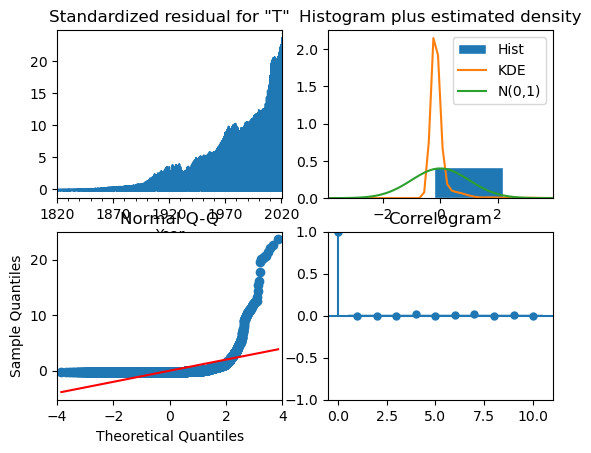

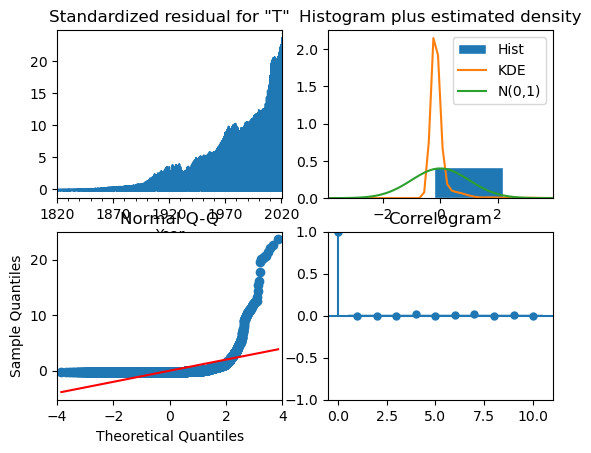

In [21]:
model = ARIMA(df.Total, order = (0,0,0))
model_fit = model.fit()
model_fit.plot_diagnostics()

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

index = df.index
columns = df.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=columns, index=index)

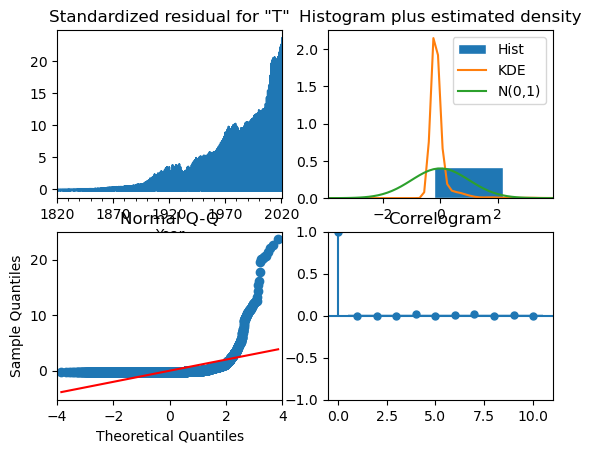

In [26]:
model = ARIMA(df_scaled.Total, order = (0,0,0))
model_fit = model.fit()
model_fit.plot_diagnostics()
plt.savefig('output.png')

In [24]:
import numpy as np
year_total.Total = np.log(year_total.Total)

C:\Users\akhil\AppData\Local\Temp\ipykernel_22512\2706236757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_total.Total = np.log(year_total.Total)


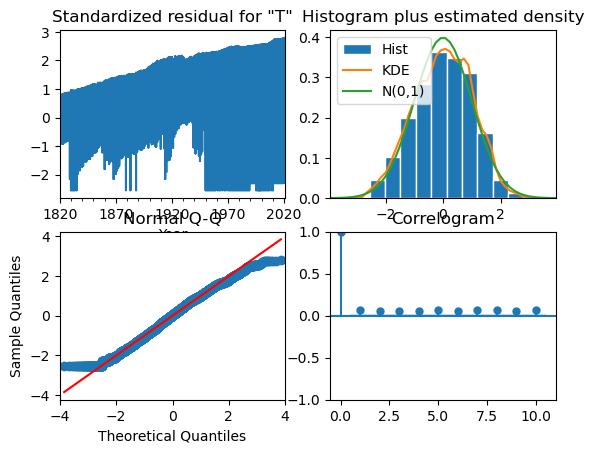

In [28]:
model = ARIMA(year_total.Total_log, order = (0,0,0))
model_fit = model.fit()
model_fit.plot_diagnostics()
plt.savefig('output.png')

In [29]:
ARIMA_model = auto_arima(year_total.Total_log,
                        start_p = 0,
                        start_q = 0,
                        test = 'adf',
                        max_p = 3, max_q = 3,
                        m=1,
                        d=None,
                        seasonal=False,
                        trace=True,
                        error_action = 'warn',
                        supress_warnings=True,
                        stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87223.981, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=85799.690, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=86213.087, Time=0.71 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=85056.020, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=84541.706, Time=0.75 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=7.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=5.44 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=82676.265, Time=2.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=82717.897, Time=1.87 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=82066.935, Time=34.92 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=29.47 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=37.43 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=81976.087, Time=35.37 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=82058.989, Time=28.82 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : 

In [32]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                16911
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -40982.044
Date:                Mon, 06 May 2024   AIC                          81976.087
Time:                        13:55:15   BIC                          82022.502
Sample:                    12-31-1820   HQIC                         81991.397
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0024      0.001      2.108      0.035       0.000       0.005
ar.L1          0.0212      0.100      0.213      0.832      -0.174       0.217
ar.L2          0.9772      0.100      9.801      0.000       0.782       1.173
ma.L1         -0.0111      0.098     -0.113      0.910      -0.204       0.181
ma.L2         -0.9687      0.097     -9.964      0.000      -1.159      -0.778
sigma2         7.4538      0.092     81.057      0.000       7.274       7.634
===================================================================================
Ljung-Box (L1) (Q):                   3.08   Jarque-Bera (JB):               151.08
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
mse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in tss.split(df):
    train_data, test_data = year_total.Total_log.iloc[train_index], year_total.Total_log.iloc[test_index]

    model = ARIMA(train_data, order = (2,0,2))
    fitted_model = model.fit()

    y_pred = fitted_model.forecast(steps=len(test_data))

    mse = mean_squared_error(test_data, y_pred)
    mse_scores.append(mse)

    mae = mean_absolute_error(test_data, y_pred)
    mae_scores.append(mae)

    r2 = r2_score(test_data, y_pred)
    r2_scores.append(r2)
    
    print(f'Mean Squared Error for current split: {mse}', len(train_index))
    print(f'Mean Absolute Error for current split: {mae}', len(train_index))
    print(f'r squared for current split: {r2}', len(train_index))

C:\Users\akhil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error for current split: 8.278367394748338 2821
Mean Absolute Error for current split: 2.366673860742334 2821
r squared for current split: -0.025509960629299666 2821


C:\Users\akhil\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error for current split: 8.202143357850927 5639
Mean Absolute Error for current split: 2.378322074540778 5639
r squared for current split: -0.01855847723238213 5639


C:\Users\akhil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error for current split: 7.970835224664152 8457
Mean Absolute Error for current split: 2.3520902894084195 8457
r squared for current split: -0.008868861118933369 8457
Mean Squared Error for current split: 7.902789021321692 11275
Mean Absolute Error for current split: 2.3140876840364255 11275
r squared for current split: -0.02162685568304057 11275


C:\Users\akhil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error for current split: 7.4837611143769145 14093
Mean Absolute Error for current split: 2.2302891389317123 14093
r squared for current split: -0.04162291448241695 14093


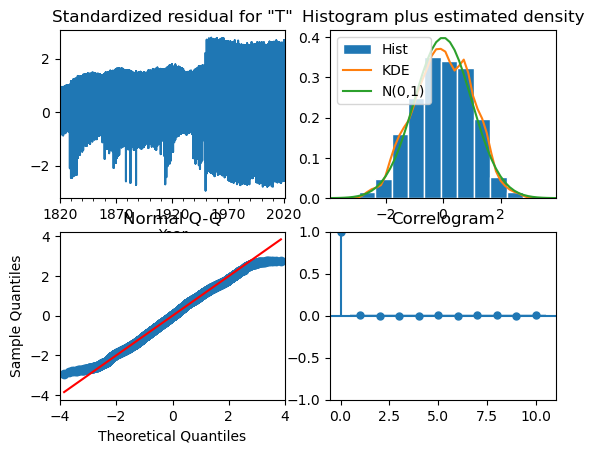

In [31]:
model = ARIMA(year_total.Total_log, order = (2,0,2))
model_fit = model.fit()
model_fit.plot_diagnostics()
plt.savefig('output.png')